## Math 538: Homework 6

Stephen Giang

RedID: 823184070

Due: 10-24-24


In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Problem 1

For the logistic map $f(x)=ax(1-x)$, write a program to compute the Lyapunov exponent and reproduce Fig. 6.3. Also plot (just below) the bifurcation diagram for the same $a$-window and compare/discuss both plots. Elaborate!

<img src="figs/fig6.3a.png" width="300" height="300"/> <img src="figs/fig6.3b.png" width="300" height="300"/>

<img src="figs/fig6.3d.png" width="600" />


In [17]:
def Lyapunov(f, df, x_1, n):
    x_k = x_1
    L_num = 1
    for k in range(1, n + 1):
        L_num *= np.abs(df(x_k))
        x_k = f(x_k)
        if L_num == 0:
            return 0, -1e9
    L_num = np.power(L_num, 1 / n)
    L_exp = np.log(L_num) if L_num > 0 else 0
    return L_num, L_exp

def logistics(a):
    return lambda x: a * x * (1 - x)

def d_logistics(a):
    return lambda x: a * (1 - 2 * x)

def plot_Lyapunov_Exp(a_range, f, df, n):
    L_exp_range = []
    for a in a_range:
        x = np.random.random()
        L_num, L_exp = Lyapunov(f(a), df(a), x, n)
        L_exp_range.append(L_exp)
    plt.figure()
    plt.grid()
    plt.plot(a_range, L_exp_range, 'b-')
    plt.xlabel('$a$')
    plt.ylabel('$h(x_1)$')
    plt.title('Lyapunov Exponent at Different $a$ values')
    plt.ylim(-1, 1)

def plot_bifurication(a_range, f):
    x_vals = []
    for a in a_range:
        x = np.random.random()
        for _ in range(int(1_000)):
            x = f(a)(x)
        x_vals.append(x)
    plt.figure()
    plt.grid()
    plt.plot(a_range, x_vals, ',')
    plt.xlabel('$a$')
    plt.ylabel('$g_a(x)$')
    plt.title('Bifurication - Logistics Map')

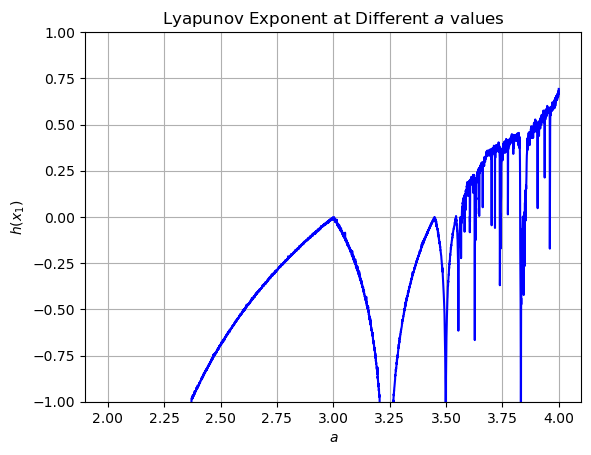

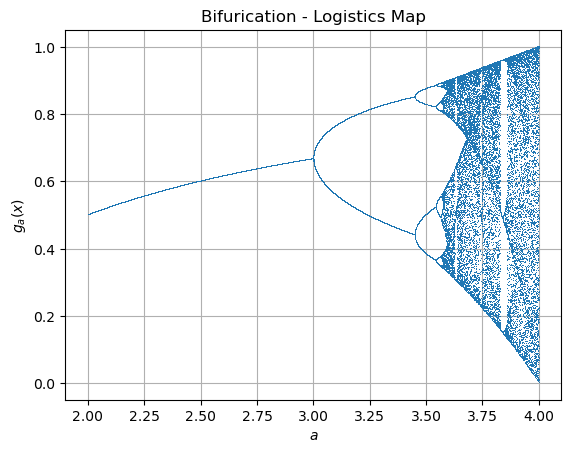

In [20]:
a_range = np.linspace(2, 4, int(5e3))
plot_Lyapunov_Exp(a_range, logistics, d_logistics, int(7.5e2))

a_range = np.linspace(2, 4, int(1e5))
plot_bifurication(a_range, logistics)

### Problem 2

Do the same for the cubic map of the extra credit of HW#03: $f(x) =ax^3 + (1-a) x$, for $a$ in $[2,4]$.


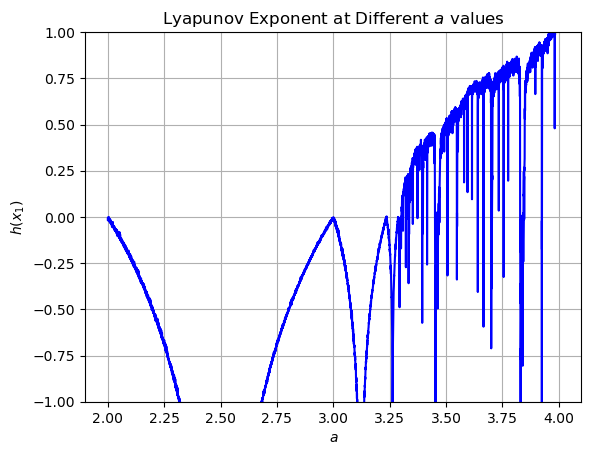

In [22]:
def cubic(a):
    return lambda x: (a * (x ** 3)) + ((1 - a) * x)

def d_cubic(a):
    return lambda x: (3 * a * (x ** 2)) + (1 - a)

a_range = np.linspace(2, 4, int(8e3))
plot_Lyapunov_Exp(a_range, cubic, d_cubic, int(6e2))

### Problem 3.1

Let $f_a(x) = a - x^2$, where $a$ is a constant.


#### Problem 3.1a

Find a value $a_1$ of the parameter $a$ for which $f_a$ has exactly one fixed point.

First, we need to set $f_{a_1}(x_k) = x_k$,

$$
\begin{align*}
    f_{a_1}(x_k) = a_1 - x_k^2 &= x_k \\
    x_k^2 + x_k - a_1 &= 0
\end{align*}
$$

such that, we get the following solution:
$$x_k = \frac{1}{2} \bigg(-1 \pm \sqrt{1 + 4a_1}\bigg)$$
To have exactly one fixed point, we get the following:
$$\sqrt{1 + 4a_1} = 0 \qquad 1 + 4a_1 = 0 \qquad a_1 = -\frac{1}{4}$$


#### Problem 3.1b

Describe the limit of all orbits of $f_a$ for $a < a_1$

Notice for $a < a_1$, we get $x_k = \frac{1}{2} \pm b i$


#### Problem 3.1c

The map $f_a$ has an attracting fixed point for $a$ in the open interval $(a_1, a_2)$. Find $a_2$.

To have an attracting fixed point, we need the following to be true:

$$
x_k = \frac{1}{2} \bigg(-1 \pm \sqrt{1 + 4a_1}\bigg) < 0
$$

Notice that this is true when:

$$
-1 + \sqrt{1 + 4a_1} < 0 \rightarrow a_1 < 0 \qquad -1 - \sqrt{1 + 4a_1} < 0 \rightarrow a_1 > -\frac{1}{4}
$$

such that we get $$ a_2 = 0 $$


#### Problem 3.1d

The map $f_a$ has an attracting period-two point for $a$ in the open interval $(a_2, a_3)$. Find $a_3$.


#### Problem 3.1e

Describe the dynamics of $f_a$ for $a = 2$.


#### Problem 3.3a

Find a conjugacy $C$ between $G(x) = 4x(1 - x)$ and $g(x) = 2 - x^2$.

By the definition of a Conjugacy, we get:

$$ C(G(x)) = g(C(x)) $$

Let $C$ be the conjugacy function for $G$ and $g$, and also let $C$ be linear:
$$ C(x) = ax + b $$
such that we get:
$$ a(4x(1-x)) + b = 2 - (ax + b)^2$$
Now we simply to solve for $a$ and $b$:

$$
\begin{align*}
    4ax - 4ax^2 + b &= 2 - a^2x^2 - 2abx - b^2 \\
    -4ax^2 + 4ax + b &= - a^2x^2 - 2abx + (- b^2 + 2)
\end{align*}
$$

Solving for the coefficients, we get the following system:

$$
-4a = -a^2 \rightarrow a = 2,0 \qquad b = -b^2 + 2 \rightarrow b = -2,1 \qquad 4a = -2ab \rightarrow (a,b) = (0,1),(0,-2),(2, -2)
$$

Assuming that $a \not = 0$, we get the following conjugacy:
$$ C(x) = 2x - 2 $$


#### Problem 3.3b

Show that $g(x)$ has chaotic orbits.

Notice that $g(x)$ will have a chaotic orbit if the following are true:
$$ \lim\_{n \rightarrow \infty} \frac{1}{n} \bigg[\ln|f'(x_1)| + \cdots + \ln|f'(x_n)|\bigg] > 0 $$


### Problem 3.4

Show that $g(x) = 2.5x(1 - x)$ has no chaotic orbits.


### Problem 3.15

a) A perfect shuffle is performed by dividing a 52-card deck in half,
and interleaving the halves, so that the cards from the top half alternate with the
cards from the bottom half. The top card stays on top, and so it and the bottom
card are fixed by this operation. Show that 8 perfect shuffles return the deck to its
original order. [Hint: Number the original card order from 0 to 51. Then a perfect
shuffle can be expressed as the map

$$
f(n) = \begin{cases}
    2n & \text{ if } 0 \leq n \leq 25 \\
    2n - 51 & \text{ if } 26 \leq n \leq 51
\end{cases}
$$

The goal is to show that all integers are fixed points under $f^8$.
First show that $f^8(n) = 28n - 51k$ for some integer $k$, where $k$ may be different for different $n$.]
Caution: when demonstrating at actual parties, be sure to remove the jokers first! If the deck consists of 54 cards, then 52 perfect shuffles are required.

b) If the bottom card 51 is ignored (it is fixed by the map anyway), the
above map is $f(x) = 2x $(mod $51$), where we now consider $x$ to be a real number.
Nonperiodic orbits have Lyapunov number equal to 2, yet every integer point is
periodic with period a divisor of 8. Sharkovskii’s Theorem shows that it is typical for
chaotic maps to contain many periodic orbits. Find all possible periods for periodic
orbits for this map on the interval $[0, 51]$.
